In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import inspect
from MeshTool.MeshTool import *

### Select OpenFOAM version

In [2]:
of_version = 'OpenFOAM-5.x'

### Define the output location

In [3]:
path = "output/testSpeed1"

### Whether to use non-uniform mesh

In [4]:
if_expansion = True

### Whether to print 'block' and 'mesh' information in the python console

In [5]:
if_prBlock = True
if_prMesh = True

### Whether to interactively define mesh parameters and boundary conditions

In [6]:
if_interactionMeshParameter = False
if_interactionDefineBoundary = False

### Input characteristic geometric points
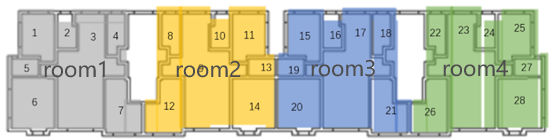

#### Define the fluid computational domain

In [7]:
h = 25000 # The overall height of the buiding
rm = 6 # The multiple for the computational domain extended from the building in all direction
rm_downstream = 15 # Additional extension in the downstream x+ direction
Fluid_domain = np.array([[-1000-rm*h, 0, -1000-rm*h, 46360+rm_downstream*h, 21000+rm*h, 11780+rm*h]])/1000 # Unit: m

#### Define the building walls

In [8]:
## Processing of the leftmost room 1 in single-layer -------- Walls
coordAbs_wall_single_1 = np.array([
## z+ wall
[0, 600, 10200, 1880, 3000, 10480],
[1600, 600, 10480, 2100, 3000, 10780],
# [2100, 600, 10480, 2980, 3000, 10780], # window1
[2980, 600, 10480, 3480, 3000, 10780],
[3200, 600, 10200, 4820, 3000, 10480],
# [4820, 600, 10200, 7520, 3000, 10480], # window2
[7520, 600, 10200, 8180, 3000, 10480],
[7960, 600, 10480, 8620, 3000, 10780],
# [8620, 600, 10480, 10790, 3000, 10780], # window3
[10790, 600, 10480, 11340, 3000, 10780],
[11230, 600, 7860, 11340, 3000, 10480],
## x+ wall
[9830, 600, 7860, 11230, 3000, 8080],
[9830, 600, 4440, 10050, 3000, 7860],
[9350, 600, 4440, 9830, 3000, 4660],
[9130, 600, 3260, 9350, 3000, 4660],
[9350, 600, 3260, 9830, 3000, 3480],
[9830, 600, 280, 10050, 3000, 3480],
## z- wall
[9610, 600, 0, 10790, 3000, 280],
# [10790, 600, 0, 11340, 3000, 280], # window4
# [8550, 600, 0, 9610, 3000, 280], # window5
[7670, 600, 0, 8550, 3000, 280],
# [6150, 600, 0, 7670, 3000, 280], # window6
[5270, 600, 0, 6150, 3000, 280],
# [4370, 600, 0, 5270, 3000, 280], # window7
[3480, 600, 0, 4370, 3000, 280],
# [1630, 600, 0, 3480, 3000, 280], # window8
[900, 600, 0, 1630, 3000, 280],
## x- wall
[900, 600, 280, 1180, 3000, 1130],
# [900, 600, 1130, 1180, 3000, 3260], # window9
[900, 600, 3260, 1180, 3000, 4180],
[280, 600, 3900, 900, 3000, 4180],
[0, 600, 3900, 280, 3000, 6900],
# [0, 600, 6900, 280, 3000, 9300], # window10
[0, 600, 9300, 280, 3000, 10200],
## internal wall
[1180, 600, 3900, 2540, 3000, 4180],
[280, 600, 5640, 4150, 3000, 5860],
[2540, 600, 3900, 2760, 3000, 5640],
[2760, 600, 4440, 3930, 3000, 4660],
[3930, 600, 280, 4150, 3000, 4660],
[3930, 600, 5860, 4150, 3000, 10200],
[4150, 600, 3260, 5710, 3000, 3480],
[5490, 600, 280, 5710, 3000, 1350],
[5710, 600, 1130, 5930, 3000, 3480],
[8110, 600, 280, 8330, 3000, 4180],
[8330, 600, 3900, 9130, 3000, 4180],
[7960, 600, 5640, 8180, 3000, 10200],
[8180, 600, 5640, 9830, 3000, 5860],
    
[280, 600, 4180, 2540, 3000, 5640] # The non-ventilated room is directly deleted as a block
    
])/1000 # Unit: m

## Processing of the leftmost room 1 in single-layer -------- Floor
coordAbs_floor_single_1 = np.array([
[900, 0, 0, 11340, 600, 3900],
[0, 0, 3900, 11340, 600, 10480],
[1600, 0, 10480, 3480, 600, 10780],
[7960, 0, 10480, 11340, 600, 10780]
])/1000 # Unit: m

## Processing of the leftmost room 1 in single-layer -------- Windows
coordAbs_window_single_1 = np.array([
[2100, 600, 10480, 2980, 3000, 10780], # window1
[4820, 600, 10200, 7520, 3000, 10480], # window2
[8620, 600, 10480, 10790, 3000, 10780], # window3
[10790, 600, 0, 11340, 3000, 280], # window4
[8550, 600, 0, 9610, 3000, 280], # window5
[6150, 600, 0, 7670, 3000, 280], # window6
[4370, 600, 0, 5270, 3000, 280], # window7
[1630, 600, 0, 3480, 3000, 280], # window8
[900, 600, 1130, 1180, 3000, 3260], # window9
[0, 600, 6900, 280, 3000, 9300], # window10
])/1000 # Unit: m

In [9]:
## Extend room 1 to the other three rooms -- Walls
coordAbs_wall_single_2 = coordAbs_wall_single_1.copy()
coordAbs_wall_single_2[:,0] = 11.34 * 2 - coordAbs_wall_single_1[:,3]
coordAbs_wall_single_2[:,3] = 11.34 * 2 - coordAbs_wall_single_1[:,0]
coordAbs_wall_single_3 = coordAbs_wall_single_1.copy()
coordAbs_wall_single_3[:,0] = 11.34 * 2 -0.28 + coordAbs_wall_single_1[:,0]
coordAbs_wall_single_3[:,3] = 11.34 * 2 -0.28 + coordAbs_wall_single_1[:,3]
coordAbs_wall_single_4 = coordAbs_wall_single_2.copy()
coordAbs_wall_single_4[:,0] = 11.34 * 2 -0.28 + coordAbs_wall_single_2[:,0]
coordAbs_wall_single_4[:,3] = 11.34 * 2 -0.28 + coordAbs_wall_single_2[:,3]

## Extend room 1 to the other three rooms -- Floors
coordAbs_floor_single_2 = coordAbs_floor_single_1.copy()
coordAbs_floor_single_2[:,0] = 11.34 * 2 - coordAbs_floor_single_1[:,3]
coordAbs_floor_single_2[:,3] = 11.34 * 2 - coordAbs_floor_single_1[:,0]
coordAbs_floor_single_3 = coordAbs_floor_single_1.copy()
coordAbs_floor_single_3[:,0] = 11.34 * 2 -0.28 + coordAbs_floor_single_1[:,0]
coordAbs_floor_single_3[:,3] = 11.34 * 2 -0.28 + coordAbs_floor_single_1[:,3]
coordAbs_floor_single_4 = coordAbs_floor_single_2.copy()
coordAbs_floor_single_4[:,0] = 11.34 * 2 -0.28 + coordAbs_floor_single_2[:,0]
coordAbs_floor_single_4[:,3] = 11.34 * 2 -0.28 + coordAbs_floor_single_2[:,3]

## Extend room 1 to the other three rooms -- Windows
coordAbs_window_single_2 = coordAbs_window_single_1.copy()
coordAbs_window_single_2[:,0] = 11.34 * 2 - coordAbs_window_single_1[:,3]
coordAbs_window_single_2[:,3] = 11.34 * 2 - coordAbs_window_single_1[:,0]
coordAbs_window_single_3 = coordAbs_window_single_1.copy()
coordAbs_window_single_3[:,0] = 11.34 * 2 -0.28 + coordAbs_window_single_1[:,0]
coordAbs_window_single_3[:,3] = 11.34 * 2 -0.28 + coordAbs_window_single_1[:,3]
coordAbs_window_single_4 = coordAbs_window_single_2.copy()
coordAbs_window_single_4[:,0] = 11.34 * 2 -0.28 + coordAbs_window_single_2[:,0]
coordAbs_window_single_4[:,3] = 11.34 * 2 -0.28 + coordAbs_window_single_2[:,3]

## Merge rooms within a single floor
coordAbs_wall_single = np.vstack((coordAbs_wall_single_1, coordAbs_wall_single_2, coordAbs_wall_single_3, coordAbs_wall_single_4))
coordAbs_floor_single = np.vstack((coordAbs_floor_single_1, coordAbs_floor_single_2, coordAbs_floor_single_3, coordAbs_floor_single_4))
coordAbs_window_single = np.vstack((coordAbs_window_single_1, coordAbs_window_single_2, coordAbs_window_single_3, coordAbs_window_single_4))

## Ceilings of rooms within a single floor
coordAbs_up_single = coordAbs_floor_single.copy()
coordAbs_up_single[:,1] = 3
coordAbs_up_single[:,4] = 3.3

In [10]:
## Definition of walls below the windows
coordAbs_windowBlew_single = coordAbs_window_single.copy()
coordAbs_windowBlew_single[:,4] = coordAbs_window_single[:,1] + 0.9

## Definition of walls above the windows
coordAbs_windowUp_single = coordAbs_window_single.copy()
coordAbs_windowUp_single[:,1] = coordAbs_window_single[:,4] -0.3

In [11]:
## Expand the building to n floors
# Floor 1
coordAbs_wall_1 = coordAbs_wall_single.copy()
coordAbs_floor_1 = coordAbs_floor_single.copy()
coordAbs_window_1 = coordAbs_window_single.copy()
coordAbs_windowBlew_1 = coordAbs_windowBlew_single.copy()
coordAbs_windowUp_1 = coordAbs_windowUp_single.copy()
# Floor 2
coordAbs_wall_2 = coordAbs_wall_single.copy()
coordAbs_wall_2[:, [1, 4]] += 3.0
coordAbs_floor_2 = coordAbs_floor_single.copy()
coordAbs_floor_2[:, [1, 4]] += 3.0
coordAbs_window_2 = coordAbs_window_single.copy()
coordAbs_window_2[:, [1, 4]] += 3.0
coordAbs_windowBlew_2 = coordAbs_windowBlew_single.copy()
coordAbs_windowBlew_2[:, [1, 4]] += 3.0
coordAbs_windowUp_2 = coordAbs_windowUp_single.copy()
coordAbs_windowUp_2[:, [1, 4]] += 3.0
# Floor 3
coordAbs_wall_3 = coordAbs_wall_single.copy()
coordAbs_wall_3[:, [1, 4]] += 3.0*2
coordAbs_floor_3 = coordAbs_floor_single.copy()
coordAbs_floor_3[:, [1, 4]] += 3.0*2
coordAbs_window_3 = coordAbs_window_single.copy()
coordAbs_window_3[:, [1, 4]] += 3.0*2
coordAbs_windowBlew_3 = coordAbs_windowBlew_single.copy()
coordAbs_windowBlew_3[:, [1, 4]] += 3.0*2
coordAbs_windowUp_3 = coordAbs_windowUp_single.copy()
coordAbs_windowUp_3[:, [1, 4]] += 3.0*2
# Floor 4
coordAbs_wall_4 = coordAbs_wall_single.copy()
coordAbs_wall_4[:, [1, 4]] += 3.0*3
coordAbs_floor_4 = coordAbs_floor_single.copy()
coordAbs_floor_4[:, [1, 4]] += 3.0*3
coordAbs_window_4 = coordAbs_window_single.copy()
coordAbs_window_4[:, [1, 4]] += 3.0*3
coordAbs_windowBlew_4 = coordAbs_windowBlew_single.copy()
coordAbs_windowBlew_4[:, [1, 4]] += 3.0*3
coordAbs_windowUp_4 = coordAbs_windowUp_single.copy()
coordAbs_windowUp_4[:, [1, 4]] += 3.0*3
# Floor 5
coordAbs_wall_5 = coordAbs_wall_single.copy()
coordAbs_wall_5[:, [1, 4]] += 3.0*4
coordAbs_floor_5 = coordAbs_floor_single.copy()
coordAbs_floor_5[:, [1, 4]] += 3.0*4
coordAbs_window_5 = coordAbs_window_single.copy()
coordAbs_window_5[:, [1, 4]] += 3.0*4
coordAbs_windowBlew_5 = coordAbs_windowBlew_single.copy()
coordAbs_windowBlew_5[:, [1, 4]] += 3.0*4
coordAbs_windowUp_5 = coordAbs_windowUp_single.copy()
coordAbs_windowUp_5[:, [1, 4]] += 3.0*4
# Floor 6
coordAbs_wall_6 = coordAbs_wall_single.copy()
coordAbs_wall_6[:, [1, 4]] += 3.0*5
coordAbs_floor_6 = coordAbs_floor_single.copy()
coordAbs_floor_6[:, [1, 4]] += 3.0*5
coordAbs_window_6 = coordAbs_window_single.copy()
coordAbs_window_6[:, [1, 4]] += 3.0*5
coordAbs_windowBlew_6 = coordAbs_windowBlew_single.copy()
coordAbs_windowBlew_6[:, [1, 4]] += 3.0*5
coordAbs_windowUp_6 = coordAbs_windowUp_single.copy()
coordAbs_windowUp_6[:, [1, 4]] += 3.0*5
# Floor 7
coordAbs_wall_7 = coordAbs_wall_single.copy()
coordAbs_wall_7[:, [1, 4]] += 3.0*6
coordAbs_floor_7 = coordAbs_floor_single.copy()
coordAbs_floor_7[:, [1, 4]] += 3.0*6
coordAbs_window_7 = coordAbs_window_single.copy()
coordAbs_window_7[:, [1, 4]] += 3.0*6
coordAbs_windowBlew_7 = coordAbs_windowBlew_single.copy()
coordAbs_windowBlew_7[:, [1, 4]] += 3.0*6
coordAbs_windowUp_7 = coordAbs_windowUp_single.copy()
coordAbs_windowUp_7[:, [1, 4]] += 3.0*6
# Floor 8
coordAbs_wall_8 = coordAbs_wall_single.copy()
coordAbs_wall_8[:, [1, 4]] += 3.0*7
coordAbs_floor_8 = coordAbs_floor_single.copy()
coordAbs_floor_8[:, [1, 4]] += 3.0*7
coordAbs_window_8 = coordAbs_window_single.copy()
coordAbs_window_8[:, [1, 4]] += 3.0*7
coordAbs_windowBlew_8 = coordAbs_windowBlew_single.copy()
coordAbs_windowBlew_8[:, [1, 4]] += 3.0*7
coordAbs_windowUp_8 = coordAbs_windowUp_single.copy()
coordAbs_windowUp_8[:, [1, 4]] += 3.0*7
# Floor 9
coordAbs_wall_9 = coordAbs_wall_single.copy()
coordAbs_wall_9[:, [1, 4]] += 3.0*8
coordAbs_floor_9 = coordAbs_floor_single.copy()
coordAbs_floor_9[:, [1, 4]] += 3.0*8
coordAbs_window_9 = coordAbs_window_single.copy()
coordAbs_window_9[:, [1, 4]] += 3.0*8
coordAbs_windowBlew_9 = coordAbs_windowBlew_single.copy()
coordAbs_windowBlew_9[:, [1, 4]] += 3.0*8
coordAbs_windowUp_9 = coordAbs_windowUp_single.copy()
coordAbs_windowUp_9[:, [1, 4]] += 3.0*8
# Roof
coordAbs_up = coordAbs_up_single.copy()
coordAbs_up[:, [1, 4]] += 3.0*8

In [12]:
## Merge all floors
coordAbs_wall = np.vstack((coordAbs_wall_1, coordAbs_wall_2, coordAbs_wall_3, coordAbs_wall_4, coordAbs_wall_5, coordAbs_wall_6, coordAbs_wall_7, coordAbs_wall_8, coordAbs_wall_9))
coordAbs_floor = np.vstack((coordAbs_floor_1, coordAbs_floor_2, coordAbs_floor_3, coordAbs_floor_4, coordAbs_floor_5, coordAbs_floor_6, coordAbs_floor_7, coordAbs_floor_8, coordAbs_floor_9))
coordAbs_window = np.vstack((coordAbs_window_1, coordAbs_window_2, coordAbs_window_3, coordAbs_window_4, coordAbs_window_5, coordAbs_window_6, coordAbs_window_7, coordAbs_window_8, coordAbs_window_9))
coordAbs_windowBlew = np.vstack((coordAbs_windowBlew_1, coordAbs_windowBlew_2, coordAbs_windowBlew_3, coordAbs_windowBlew_4, coordAbs_windowBlew_5, coordAbs_windowBlew_6, coordAbs_windowBlew_7, coordAbs_windowBlew_8, coordAbs_windowBlew_9))
coordAbs_windowUp = np.vstack((coordAbs_windowUp_1, coordAbs_windowUp_2, coordAbs_windowUp_3, coordAbs_windowUp_4, coordAbs_windowUp_5, coordAbs_windowUp_6, coordAbs_windowUp_7, coordAbs_windowUp_8, coordAbs_windowUp_9))

In [13]:
if_window_open = True # Set whether the building's windows are open

In [14]:
# The entire rectangular domain
coordAll = Fluid_domain

# Solid obstacles
if if_window_open: # if windows are open, obstacles only include the walls above and below the windows
    coordAbs = np.vstack((coordAbs_wall, coordAbs_floor, coordAbs_up, coordAbs_windowBlew, coordAbs_windowUp))
else:
    coordAbs = np.vstack((coordAbs_wall, coordAbs_floor, coordAbs_up, coordAbs_window))

# Surfaces carved on the face
coordCarve = np.empty((0, 6))

Feature_geometry = np.vstack((coordAll, coordAbs, coordCarve))

### Mesh Tool Execution

In [15]:
Gui = meshTool(of_version, path, Feature_geometry, coordAbs, if_expansion, if_prBlock)

Dividing the entire space into blocks based on geometric points: 
	Coordinates in the x-direction: [-1.5100e+02  0.0000e+00  2.8000e-01  9.0000e-01  1.1800e+00  1.6000e+00
  1.6300e+00  1.8800e+00  2.1000e+00  2.5400e+00  2.7600e+00  2.9800e+00
  3.2000e+00  3.4800e+00  3.9300e+00  4.1500e+00  4.3700e+00  4.8200e+00
  5.2700e+00  5.4900e+00  5.7100e+00  5.9300e+00  6.1500e+00  7.5200e+00
  7.6700e+00  7.9600e+00  8.1100e+00  8.1800e+00  8.3300e+00  8.5500e+00
  8.6200e+00  9.1300e+00  9.3500e+00  9.6100e+00  9.8300e+00  1.0050e+01
  1.0790e+01  1.1230e+01  1.1340e+01  1.1450e+01  1.1890e+01  1.2630e+01
  1.2850e+01  1.3070e+01  1.3330e+01  1.3550e+01  1.4060e+01  1.4130e+01
  1.4350e+01  1.4500e+01  1.4570e+01  1.4720e+01  1.5010e+01  1.5160e+01
  1.6530e+01  1.6750e+01  1.6970e+01  1.7190e+01  1.7410e+01  1.7860e+01
  1.8310e+01  1.8530e+01  1.8750e+01  1.9200e+01  1.9480e+01  1.9700e+01
  1.9920e+01  2.0140e+01  2.0580e+01  2.0800e+01  2.1050e+01  2.1080e+01
  2.1500e+01  2.1780e+01 

In [16]:
if if_interactionMeshParameter:
    Gui.judgeExpansion()
else:
    Gui.judgeExpansion(False,[0.6,5,2])

In [17]:
Gui.generateGrid(if_prMesh)

Non-uniform mesh parameters are as follows:
	Number of sub-block partitions in the x-direction: [3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 3]
	Number of sub-block partitions in the y-direction:[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 3]
	Number of sub-block partitions in the z-direction:[3 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3]
	Coordinates in the x-direction: [-1.5100e+02 -1.4300e+02 -8.0000e+00  0.0000e+00  2.8000e-01  9.0000e-01
  1.1800e+00  1.6000e+00  1.6300e+00  1.8800e+00  2.1000e+00  2.5400e+00
  2.7600e+00  2.9800e+00  3.2000e+00  3.4800e+00  3.9300e+00  4.1500e+00
  4.3700e+00  4.8200e+00  5.2700e+00  5.4900e+00  5.7100e+00  5.9300e+00
  6.1500e+00  7.5200e+00  7.6700e+00  7.9600e+00  8.

In [18]:
if if_interactionDefineBoundary:
    Gui.defineBoundaryCondition()
else:
    bD = {}
    
    Name = 'Fuild_domain_x_P'
    bD[Name] = {}
    bD[Name]['type'] = 'wall'
    bD[Name]['faceNum'] = 1
    Fluid_domain_b = Fluid_domain[0].copy()
    Fluid_domain_b[0] = Fluid_domain_b[3]
    bD[Name]['face_1'] = Fluid_domain_b
    bD[Name]['faceRestricted_1'] = np.array([])
    
    Name = 'Fuild_domain_x_M'
    bD[Name] = {}
    bD[Name]['type'] = 'wall'
    bD[Name]['faceNum'] = 1
    Fluid_domain_b = Fluid_domain[0].copy()
    Fluid_domain_b[3] = Fluid_domain_b[0]
    bD[Name]['face_1'] = Fluid_domain_b
    bD[Name]['faceRestricted_1'] = np.array([])
    
    Name = 'Fuild_domain_z_P'
    bD[Name] = {}
    bD[Name]['type'] = 'wall'
    bD[Name]['faceNum'] = 1
    Fluid_domain_b = Fluid_domain[0].copy()
    Fluid_domain_b[2] = Fluid_domain_b[5]
    bD[Name]['face_1'] = Fluid_domain_b
    bD[Name]['faceRestricted_1'] = np.array([])
    
    Name = 'Fuild_domain_z_M'
    bD[Name] = {}
    bD[Name]['type'] = 'wall'
    bD[Name]['faceNum'] = 1
    Fluid_domain_b = Fluid_domain[0].copy()
    Fluid_domain_b[5] = Fluid_domain_b[2]
    bD[Name]['face_1'] = Fluid_domain_b
    bD[Name]['faceRestricted_1'] = np.array([])
    
    Name = 'Fuild_domain_y_P'
    bD[Name] = {}
    bD[Name]['type'] = 'wall'
    bD[Name]['faceNum'] = 1
    Fluid_domain_b = Fluid_domain[0].copy()
    Fluid_domain_b[1] = Fluid_domain_b[4]
    bD[Name]['face_1'] = Fluid_domain_b
    bD[Name]['faceRestricted_1'] = np.array([])
    
    Name = 'Fuild_domain_y_M'
    bD[Name] = {}
    bD[Name]['type'] = 'wall'
    bD[Name]['faceNum'] = 1
    Fluid_domain_b = Fluid_domain[0].copy()
    Fluid_domain_b[4] = Fluid_domain_b[1]
    bD[Name]['face_1'] = Fluid_domain_b
    buildingBottom = np.array([[np.min(Gui.coordAbs[:,0]),Fluid_domain_b[1],np.min(Gui.coordAbs[:,2]),np.max(Gui.coordAbs[:,3]),Fluid_domain_b[1],np.max(Gui.coordAbs[:,5])]])
    bD[Name]['faceRestricted_1'] = buildingBottom
    
    # Input the bD dictionary into the tool class
    Gui.defineBoundaryCondition(False, bD) # Non-interactive use

Defined boundaries have been input into the tool.


In [19]:
# Gui.delBoundaryCondition('outlet') # Remove the boundary partitioning named 'outlet'
# Gui.prBoundaryCondition() # Print all boundaries which have been partitioned
Gui.checkBoundaryCondition(if_end=False) # Check boundary partitioning without requiring all to be partitioned

Checking boundaries in the yz-plane: 
No issues detected so far, but some faces still need boundary partitioning.
Checking boundaries in the xz-plane: 
No issues detected so far, but some faces still need boundary partitioning.
Checking boundaries in the xy-plane: 
No issues detected so far, but some faces still need boundary partitioning.


### Check boundary partitioning in the end

In [20]:
Gui.checkBoundaryCondition(if_end=True)

Checking boundaries in the yz-plane: 
Boundary partitioning issue detected!
Error positions: (array([  1,   1,   1, ..., 148, 148, 148], dtype=int64), array([ 0,  0,  0, ..., 36, 36, 36], dtype=int64), array([ 7,  8,  9, ..., 15, 16, 17], dtype=int64))
Error reason: This face need to be partitioned boundary！
Checking boundaries in the xz-plane: 
Boundary partitioning issue detected!
Error positions: (array([  1,   1,   1, ..., 147, 147, 147], dtype=int64), array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64), array([ 1,  2,  3, ..., 15, 16, 17], dtype=int64))
Error reason: This face need to be partitioned boundary！
Checking boundaries in the xy-plane: 
Boundary partitioning issue detected!
Error positions: (array([  1,   1,   1, ..., 147, 147, 147], dtype=int64), array([ 0,  0,  1, ..., 35, 36, 36], dtype=int64), array([ 7, 18,  7, ..., 18,  7, 18], dtype=int64))
Error reason: This face need to be partitioned boundary！


### Extended Usage
#### Abandon mesh refinement at the fluid domain edges, meaning the mesh size gradually increases from the building surface to the fluid domain boundary.

In [21]:
if if_expansion:
    Gui.Mesh_x_exp[[0,-1]] = np.floor(Gui.distance_x_exp[[0,-1]] / Gui.Mesh_Max)
    Gui.SG_x_exp[[0,-1]] = 1
    Gui.Mesh_z_exp[[0,-1]] = np.floor(Gui.distance_z_exp[[0,-1]] / Gui.Mesh_Max)
    Gui.SG_z_exp[[0,-1]] = 1
    Gui.Mesh_y_exp[[-1]] = np.floor(Gui.distance_y_exp[[-1]] / Gui.Mesh_Max)
    Gui.SG_y_exp[[-1]] = 1

### Output to the specified directory

In [22]:
Gui.outputGrid()
Gui.outputBoundaryCondition()

Point indices successfully imported to --output/testSpeed1/blockMeshDict--folder
Point coordinates successfully imported to --output/testSpeed1/blockMeshDict--folder
Blocks and corresponding parameters successfully imported to --output/testSpeed1/blockMeshDict--folder
Boundary partitioning has been output to --output/testSpeed1/blockMeshDict-- folder
